In [2]:
#Importation of all the neccessary packages needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')
import re

In [3]:
# Twitter API credentials
consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

In [4]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Setting your access token and secret
auth.set_access_token(access_token, access_secret)

# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [10]:
# Creating the API object while passing in auth information
api = tweepy.API(auth)

# The Twitter user who we want to get tweets from
name = "davido"
# Number of tweets to pull
tweetCount = 100

# Calling the user_timeline function with our parameters
results = api.user_timeline(id=name, count=tweetCount)

# foreach through all tweets pulled
i = 1
for tweet in results:
   # printing the text stored inside the tweet object
    print (str(i) + ') ' + tweet.text + '\n')
    i = i +1

1) @ChinkoTiger 😫

2) Wahala

3) 🤦🏾‍♂️🤦🏾‍♂️🤦🏾‍♂️🤦🏾‍♂️🤦🏾‍♂️🤦🏾‍♂️🤦🏾‍♂️

4) RT @dabiodunMFR: 4. The State v. Inspector Ahmed Mohammed - Murder charge ready to be filed at the Ilaro Division of the High Court of Ogun…

5) RT @dabiodunMFR: 3. The State v. Inspector Niyi Ogunsoro - Murder trial at the Abeokuta Division of the High Court of Ogun State. Date of h…

6) RT @dabiodunMFR: 2. The State v. Okoi Obi - Manslaughter trial coming up for hearing on 2 December 2020 at the Ijebu-Ode Division of the Hi…

7) RT @dabiodunMFR: We invite the public to monitor the following criminal cases against defendant police officers in Ogun State:

1. The Stat…

8) RT @Prince_II: PLEASE EVERYBODY RETWEET. THEIR LAME WHATSAPP BROADCASTS AND STORY TELLING INTERVIEWS CAN NOT COVER UP THE TRUTH.

9) No control over Lagos at all . What a shame

10) Person wey Dey find d pity ... nah  my G

11) RT @_Kamor: This is NAANKANG ANDREW, Plateau State. He was arrested by SARS in May 2020 in Abuja. He was shot on the le

In [11]:
# creations of dataframe with a cloumn called tweet
df = pd.DataFrame([tweet.text for tweet in results], columns = ['Tweet'])
df.head()

,Tweet
0,@ChinkoTiger 😫
1,Wahala
2,🤦🏾‍♂️🤦🏾‍♂️🤦🏾‍♂️🤦🏾‍♂️🤦🏾‍♂️🤦🏾‍♂️🤦🏾‍♂️
3,RT @dabiodunMFR: 4. The State v. Inspector Ahm...
4,RT @dabiodunMFR: 3. The State v. Inspector Niy...


In [12]:
#clean up text
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+' , '', text) # removing @mentions
    text = re.sub(r'#', '', text) #removing #tag symbols
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # removing hyperlinks
    text = re.sub(r'[^0-9A-Za-z \t]', '', text)
    text = re.sub(r'\w+:\/\/\S+', '', text)
    return text

#cleaning the text
df['Tweet'] = df['Tweet'].apply(cleanTxt)

#Showing the cleaned text
df


,Tweet
0,
1,Wahala
2,
3,4 The State v Inspector Ahmed Mohammed Murde...
4,3 The State v Inspector Niyi Ogunsoro Murder...
...,...
94,We need ElectoralReform for these leaders to t...
95,This is the problem They dont feel like they o...
96,Our president has only addressed us once in th...
97,Davidos fem is our new national anthem EndSARS


In [13]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create two new columns
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

#show the new dataframe with the new columns
df

,Tweet,Subjectivity,Polarity
0,,0.000000,0.000000
1,Wahala,0.000000,0.000000
2,,0.000000,0.000000
3,4 The State v Inspector Ahmed Mohammed Murde...,0.520000,0.180000
4,3 The State v Inspector Niyi Ogunsoro Murder...,0.540000,0.160000
...,...,...,...
94,We need ElectoralReform for these leaders to t...,0.535714,0.285714
95,This is the problem They dont feel like they o...,0.500000,0.000000
96,Our president has only addressed us once in th...,0.625000,-0.125000
97,Davidos fem is our new national anthem EndSARS,0.454545,0.136364


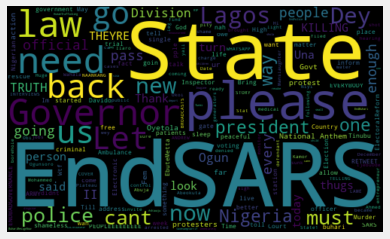

In [14]:
# Plot word cloud

allWords = ' '.join([twts for twts in df['Tweet']])
wordCloud = WordCloud(width = 500 , height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [15]:
# Create a function to compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
# Apply the getAnalysis function  
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# show dataframe 
df

,Tweet,Subjectivity,Polarity,Analysis
0,,0.000000,0.000000,Neutral
1,Wahala,0.000000,0.000000,Neutral
2,,0.000000,0.000000,Neutral
3,4 The State v Inspector Ahmed Mohammed Murde...,0.520000,0.180000,Positive
4,3 The State v Inspector Niyi Ogunsoro Murder...,0.540000,0.160000,Positive
...,...,...,...,...
94,We need ElectoralReform for these leaders to t...,0.535714,0.285714,Positive
95,This is the problem They dont feel like they o...,0.500000,0.000000,Neutral
96,Our president has only addressed us once in th...,0.625000,-0.125000,Negative
97,Davidos fem is our new national anthem EndSARS,0.454545,0.136364,Positive


In [16]:
# Print all positive tweets
j = 1
sortedDF = df.sort_values(by='Polarity')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['Tweet'][i])
        print()
        j=j+1

1)  4 The State v Inspector Ahmed Mohammed  Murder charge ready to be filed at the Ilaro Division of the High Court of Ogun

2)  3 The State v Inspector Niyi Ogunsoro  Murder trial at the Abeokuta Division of the High Court of Ogun State Date of h

3) Cant sleep  Im sure yall cant too sigh 

4)  No jobs we became entrepreneur No light we brought generators No water we sunk our own borehole Huge taxesamptarrif w

5) Has more information reached you yet your excellency 

6) Dem go inform u plenty today  cus its way more than one  and everytime Dey inform u please tweet this same w 

7) Non of the patients can look you in the eye Mr Governor  STRONG MESSAGE 

8) Facts best thing for him to do rn  but does  he have the courage to do so  

9) Please where is the hospital that most of the patients have been taken too Have they been treated for free  Is t 

10) official Thank you turkey  government  for your concern    lets retweet these maybe that old man buhari

11) Whole world please turn 

In [17]:
# Print all Negative tweets
j = 1
sortedDF = df.sort_values(by= ['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF['Tweet'][i])
        print()
        j=j+1

1)  We invite the public to monitor the following criminal cases against defendant police officers in Ogun State1 The Stat

2) II PLEASE EVERYBODY RETWEET THEIR LAME WHATSAPP BROADCASTS AND STORY TELLING INTERVIEWS CAN NOT COVER UP THE TRUTH

3) Person wey Dey find d pity  nah  my G

4) funmi Imagine this small child what does he knowunarmed EndBuhari BuhariResignNow children HumanTrafficking EndPolice

5) Now Una wan run go after making our land a bitter place to live in 

6) How can u choose money over peace  Just plain stupidness

7) Buhari its game over step down

8) THEYRE KILLING OUR PEOPLEEEEEEEEE  fucking hell

9) Lekki VI toll gate   Wtf  Country is finished 

10) Governors please tell THE PRESIDENT THE TRUTH  PLEASE  WTF

11) Bring that ur shiny head I wan check something 

12) What Fuck all of you 

13)  No Slowing Down Its EndSARS Till They EndSARS 

14) Oyetola you have failed the people of osun under your watch thugs attacked peaceful protesters There is no amou 

15) All

In [18]:
#plot polatrity and Subjectivity

#plt.figure(figsize= (8,6))
#for i in range(0, df.shape[0]):
    #plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Red')
   # plt.title('Sentiment Analysis of @AishaYesufu Twitter handle')
   #plt.xlabel('Polarity')
   # plt.ylabel('Subjectivity')
   #plt.show()

In [19]:
#get percentage positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweet']
round(ptweets.shape[0]/df.shape[0]*100, 1)

25.3

In [20]:
#get percentage Negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweet']
round(ntweets.shape[0]/df.shape[0]*100, 1)

18.2

In [22]:
#get percentage Neutral tweets
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweet']
round(ntweets.shape[0]/df.shape[0]*100, 1)

56.6

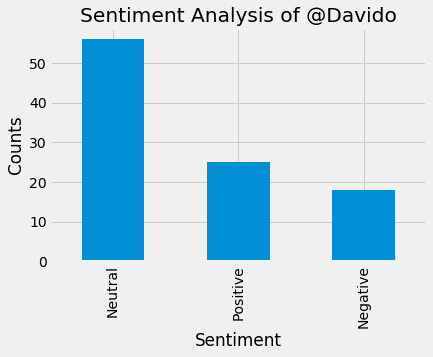

In [23]:
# show value count
df['Analysis'].value_counts

#plot the visual conts
plt.title('Sentiment Analysis of @Davido')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar') 
plt.show()